# CZ2001 Lab3, 3B: Analysing merge sort and modified merge sort

### Aim:
1. Generate datasets of varying sizes (1,000 - 1 million)
2. Count key comparisons and CPU times on the data generated, and compare the two variations of mergesort on these parameters
3. Study the performance of the algorithm as `S` varies
4. Determine the value of `S` by trial and error

### General procedure:
1. We set the data size constant, and generate the data _randomly_
2. We get the metrics (cpu time and key comparisons) for mergesort
3. For the same data, we get metrics for the modified merge sort for varying N
4. We plot these together and see,for what values of 'S' does the modified merge sort perform better than the original merge sort


5. We repeat steps 1 - 4, now for varying data types and sizes.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random, csv, copy

In [10]:
import mergeAndInsertion

## Getting comparison metrics for original mergesort

In [11]:
n=1000
data = [random.randint(1, 20000) for _ in range(n)]

#### We first calulate the CPU time and number of key comparisons for normal merge-sort algorithm

In [12]:
# testing mergesort
m=mergeAndInsertion.mergeAndInsertion(copy.deepcopy(data)) # if no deepcopy, it will modify the original data, resulting in incorrect results later on
# print('time taken:',m.timeTaken)
m.testMerge()
mergeTime = m.timeTaken
mergeComparisons = m.keyCmpCounter
print('Mergesort:')
print(f'\ttime taken : {mergeTime}ns \n\tkeyComparisons : {mergeComparisons}')

Mergesort:
	time taken : 42347900ns 
	keyComparisons : 13142


## Analyzing modified mergesort

In [13]:
# letting 'S' vary from 0 to n
tableList =[]
for S in range(0,n):
    m = mergeAndInsertion.mergeAndInsertion(copy.deepcopy(data));
    m.testMergeModified(S)
    time = m.timeTaken
    comparisons = m.keyCmpCounter
    tableList.append([S, time, comparisons])    

#### We display the dataframe (first 5 rows shown here) of the table displaying `S` going from 0 to n, the CPU time and the number of key comparisons of modified mergesort for each `S` value

In [14]:
tableDf = pd.DataFrame(tableList, columns = ['S', 'time', 'keyCmp'])
tableDf.head()

,S,time,keyCmp
0,0,26826600,13142
1,1,57026800,12077
2,2,58560900,12015
3,3,53100900,10811
4,4,51704500,10811


#### The first 2 graphs are of `S` Vs CPU running time and `S` Vs key comparisons is for n=1000 and the dataset is of 1000 randomly ordered numbers

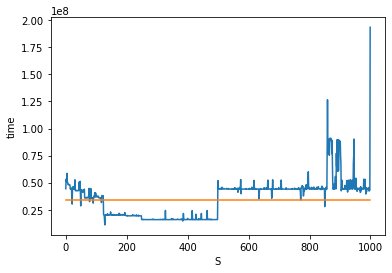

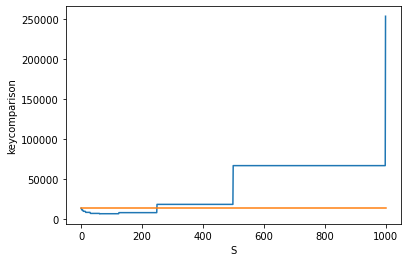

In [198]:
x = tableDf.iloc[:,0]
y = tableDf.iloc[:,1]
z = pd.Series([mergeTime]*n)
fig,ax = plt.subplots()
ax.plot(x,y,z)
ax.set(xlabel = 'S', ylabel = 'time')

x = tableDf.iloc[:,0]
y = tableDf.iloc[:,2]
z = pd.Series([mergeComparisons]*n) # y = mergeComparisons
fig2,ax2 = plt.subplots()
ax2.plot(x,y,z)
# ax.plot([0,n], [mergeComparisons,mergeComparisons])
ax2.set(xlabel = 'S', ylabel = 'keycomparison')

plt.show()

In [ ]:
x = tableDf.iloc[:,0]
y = tableDf.iloc[:,2]
z = pd.Series([mergeComparisons]*n) # y = mergeComparisons
fig,ax = plt.subplots()
ax.plot(x,y,z)
# ax.plot([0,n], [mergeComparisons,mergeComparisons])
ax.set(xlabel = 'S', ylabel = 'keycomparison')
plt.show()

# Function with which we vary 'n'

In [3]:
def compareOriginalAndModified(n, ascending = False, descending = False, step = 1):
    data = [random.randint(1, 20000) for _ in range(n)]
    if(ascending):
        data = sorted(data)
    if(descending):
        data = sorted(data, reverse = True)
    
    # Mergesort
    m=mergeAndInsertion.mergeAndInsertion(copy.deepcopy(data))
    m.testMerge()
    mergeTime = m.timeTaken
    mergeComparisons = m.keyCmpCounter
    print('Mergesort:')
    print(f'\ttime taken : {mergeTime}ns \n\tkeyComparisons : {mergeComparisons}')
    
    # Mergesort modifed :
    # letting 'S' vary from 0 to n
    tableList =[]
    for S in range(0,n, step):
        m = mergeAndInsertion.mergeAndInsertion(copy.deepcopy(data));
        m.testMergeModified(S)
        time = m.timeTaken
        comparisons = m.keyCmpCounter
        tableList.append([S, time, comparisons])    
    tableDf = pd.DataFrame(tableList, columns = ['S', 'time', 'keyCmp'])
    x = tableDf.iloc[:,0]
    y = tableDf.iloc[:,1]
    z = pd.Series([mergeTime]*n)
    fig,ax = plt.subplots()
    ax.plot(x,y,z)
    ax.set(xlabel = 'S', ylabel = 'time')

    x = tableDf.iloc[:,0]
    y = tableDf.iloc[:,2]
    z = pd.Series([mergeComparisons]*n) # y = mergeComparisons
    fig2,ax2 = plt.subplots()
    ax2.plot(x,y,z)
    # ax.plot([0,n], [mergeComparisons,mergeComparisons])
    ax2.set(xlabel = 'S', ylabel = 'keycomparison')

    plt.show()
    print('------------------------------------------------------------')

# Generating plots for different types of data:

In [201]:
n=1000

### Random data, size n, random order

Mergesort:
	time taken : 41914700ns 
	keyComparisons : 13005


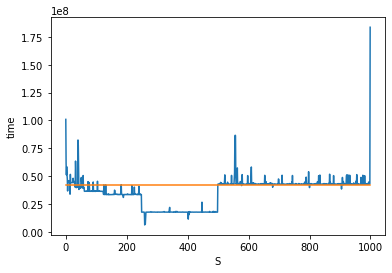

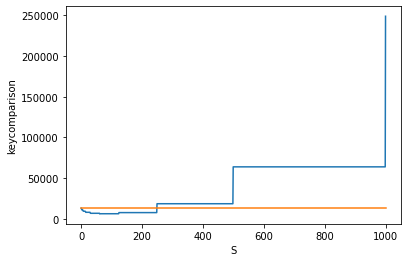

------------------------------------------------------------


In [202]:
compareOriginalAndModified(n)

### Random data, size n, in ascending order

#### Next 2 graphs are of `S` Vs CPU running time and `S` Vs key comparisons is for n=1000 and the dataset is of the same 1000 random numbers as before arranged in ascending order

Mergesort:
	time taken : 4771700ns 
	keyComparisons : 10088


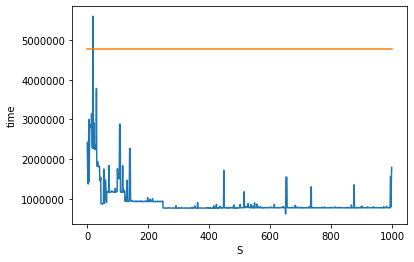

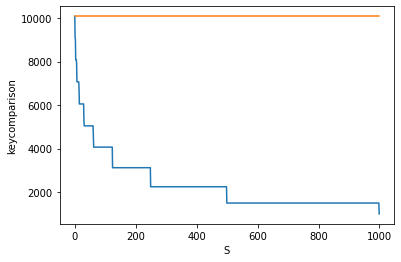

------------------------------------------------------------


In [205]:
compareOriginalAndModified(n, ascending = True)

### Random data, size n, in descending order

#### Below 2 graphs are of `S` Vs CPU running time and `S` Vs key comparisons is for n=1000 and the dataset is of the same 1000 random numbers arranged in descending order

Mergesort:
	time taken : 141202300ns 
	keyComparisons : 4959


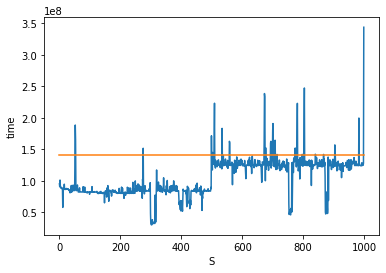

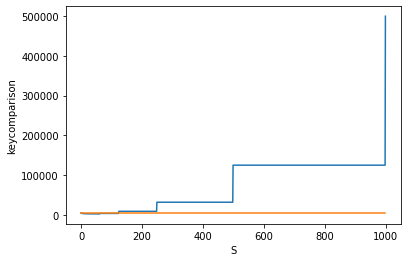

------------------------------------------------------------


In [207]:
compareOriginalAndModified(n, descending = True)

## Generating plots for different values of 'n'

### For n = 1000

Mergesort:
	time taken : 48768200ns 
	keyComparisons : 13106


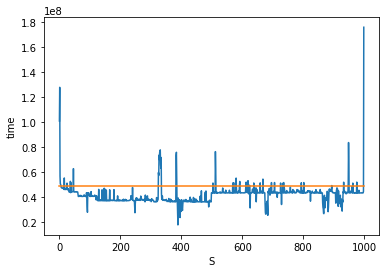

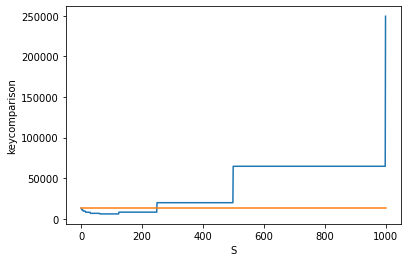

------------------------------------------------------------


In [193]:
compareOriginalAndModified(1000)

### For n = 5000

Mergesort:
	time taken : 1171714900ns 
	keyComparisons : 82809


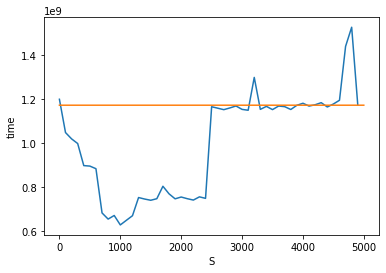

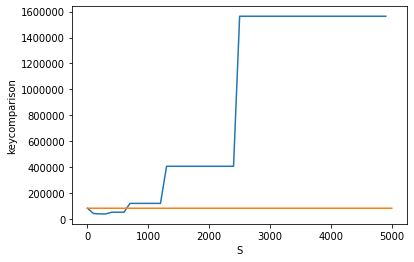

------------------------------------------------------------


In [7]:
compareOriginalAndModified(5000, step = 100)

### For n = 10,000

Mergesort:
	time taken : 5128363200ns 
	keyComparisons : 179551


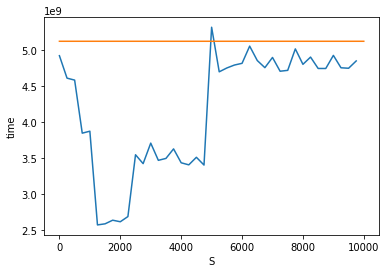

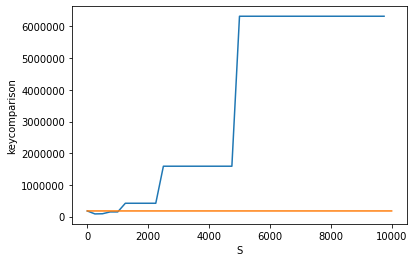

------------------------------------------------------------


In [5]:
compareOriginalAndModified(10000, step = 250)

### For n = 100,000

Mergesort:
	time taken : 485581934000ns 
	keyComparisons : 2209791


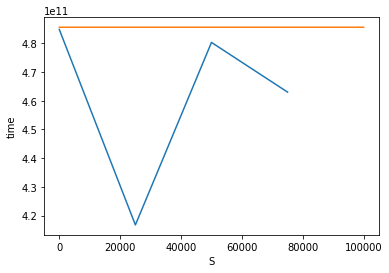

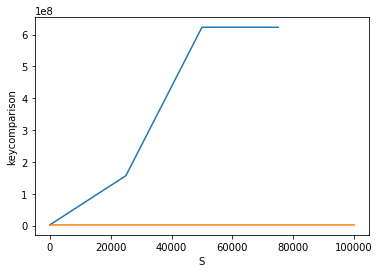

------------------------------------------------------------


In [6]:
compareOriginalAndModified(100000, step = 25000)

#### As you can see from above, as n varies from 1000 to 100,000 the running time for merge sort and the average running time for modified merge sort show an increasing trend as n increases
#### For n = 10000 and 100,000 it is clear that for higher values of `S` as the number of insertion sorts increase the number of key comparisons drastically increase as well.

# Algorithmic complexity

![](mergeInsertion.png)

#### For complexity analysis, we divide the complexity into 2 parts, insertionsort complextiy + mergesort complexity. 
First part, we perform insertionsort on an array of length x, which is complexity of  O(n/x), for n/x times.

Second part, we perform merge operation, which is of complexity of O(n), for log (n/x) times.